In [1]:
from sklearn.cluster import KMeans 
import numpy as np
x1 = np.array([0, 1])
x2 = np.array([2, 0])
print(np.sqrt(((x1-x2)**2).sum()))
# 2.23606797749979
print(np.sqrt(5))
# 2.23606797749979


2.23606797749979
2.23606797749979


In [2]:
import numpy as numpy 
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)
print(wine.iloc[:,:3].describe())

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
          alcohol  malic_acid         ash
count  178.000000  178.000000  178.000000
mean    13.000618    2.336348    2.366517
std      0.811827    1.117146    0.274344
min     11.030000    0.740000    1.360000
25%     12.362500    1.602500    2.210000
50%     13.050000    1.865000    2.360000
75%     13.677500    3.082500    2.557500
max     14.830000    5.800000    3.230000


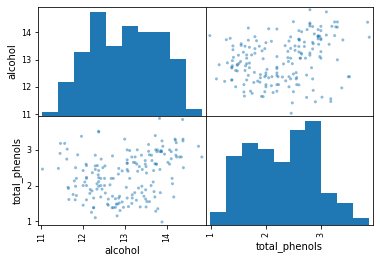

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

In [4]:
X = wine[['alcohol', 'total_phenols']]

In [5]:
from sklearn.preprocessing import StandardScaler
#instance is scaler 
scale = StandardScaler()
# compute the mean and std to be used later for scaling
# StandardScaler(copy=True, with_mean=True, with_std=True)
print(scale.fit(X))

StandardScaler()


In [6]:
print(scale.mean_)
print(scale.scale_)

[13.00061798  2.29511236]
[0.80954291 0.62409056]


[<matplotlib.lines.Line2D object at 0x7fdc26ddf790>, <matplotlib.lines.Line2D object at 0x7fdc26ddf950>]


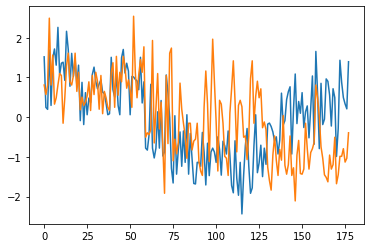

In [7]:
X_scaled = scale.transform(X)
print(plt.plot(X_scaled))


{'whiskers': [<matplotlib.lines.Line2D object at 0x7fdc26d511d0>, <matplotlib.lines.Line2D object at 0x7fdc26d65510>, <matplotlib.lines.Line2D object at 0x7fdc26d76410>, <matplotlib.lines.Line2D object at 0x7fdc26dbd8d0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fdc26d65a10>, <matplotlib.lines.Line2D object at 0x7fdc26d65f10>, <matplotlib.lines.Line2D object at 0x7fdc26d76dd0>, <matplotlib.lines.Line2D object at 0x7fdc26d7f310>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fdc26d5e3d0>, <matplotlib.lines.Line2D object at 0x7fdc26d6de50>], 'medians': [<matplotlib.lines.Line2D object at 0x7fdc26d6d490>, <matplotlib.lines.Line2D object at 0x7fdc26d7f810>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fdc26d6d990>, <matplotlib.lines.Line2D object at 0x7fdc26d7fd10>], 'means': []}


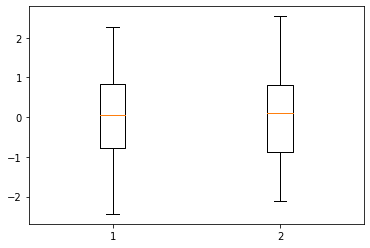

In [8]:
print(plt.boxplot(X_scaled))

([array([ 2., 13., 19., 31., 22., 29., 33., 21.,  6.,  2.]), array([ 1., 12., 30., 26., 19., 33., 24., 23.,  8.,  2.])], array([-2.43423535, -1.93686027, -1.43948518, -0.9421101 , -0.44473502,
        0.05264006,  0.55001514,  1.04739022,  1.5447653 ,  2.04214039,
        2.53951547]), <a list of 2 Lists of Patches objects>)


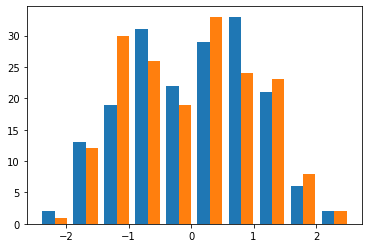

In [9]:
print(plt.hist(X_scaled))

In [10]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[ 7.84141790e-15 -1.95536471e-16]
[1. 1.]


In [11]:
from sklearn.cluster import KMeans 
# instantiate the model
kmeans = KMeans(n_clusters = 3)
# fit the model
kmeans.fit(X_scaled)
# make predictions
y_pred=kmeans.predict(X_scaled)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 0 1 0 1 0 2 1 2 1
 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]


In [12]:
kmeans.cluster_centers_

array([[-1.06309124,  0.06418028],
       [ 0.92017418,  0.87087204],
       [ 0.07498401, -1.14070754]])

In [13]:
import matplotlib.pyplot  as plt

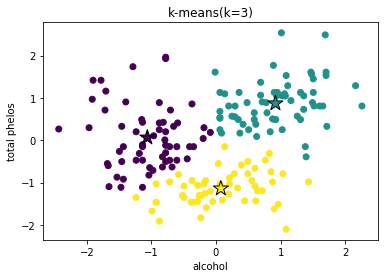

In [14]:
# plot the scaled data
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = y_pred)
# identify the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker = '*', s = 250,c=[0,1,2], edgecolors='k')
plt.xlabel('alcohol');plt.ylabel('total phelos')
plt.title('k-means(k=3)')
plt.show()

In [15]:
X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

[[-0.00076337  0.32829793]]


In [16]:
kmeans.predict(X_new_scaled)

array([1], dtype=int32)

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans.inertia_

185.25081541190127

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.inertia_

114.34674038310783

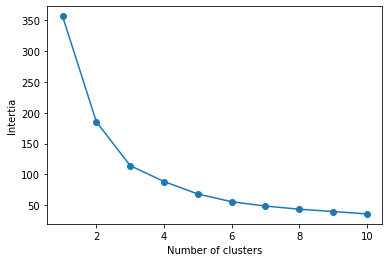

In [19]:
# calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
#plot
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')
plt.show()

In [20]:
X = wine 
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)


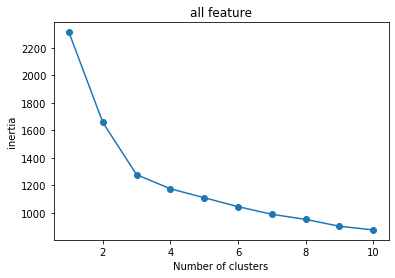

In [24]:
inertia = []
for i in np.arange(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(np.arange(1,11), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.title('all feature')
plt.show()


In [25]:
k_opt = 3 
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
